In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CREDIT_CONTRACTS =pd.read_csv('CREDIT_CONTRACTS.csv')
CREDIT_CONTRACTS.head()

,CIF,CONTRACT_NUMBER,PRODUCT_CODE,STATUS,AMOUNT/LIMIT,INTEREST,DURATION,OPEN_DATE,CLOSE_DATE,ACCOUNT_NUMBER
0,1000094,BBLK0001,BBLK,ACTIVE,7100,25,36,8/6/2021,8/5/2024,3.881791e+09
1,1000043,BBLK0002,BBLK,ACTIVE,5000,25,36,1/28/2021,1/28/2024,3.881791e+09
2,1000093,BBLK0003,BBLK,ACTIVE,5500,25,36,7/21/2020,7/21/2023,3.881791e+09
3,1000096,BBLK0004,BBLK,ACTIVE,2500,25,36,1/1/2021,1/1/2024,3.881792e+09
4,1000081,BBLK0005,BBLK,CLOSED,6400,25,36,11/7/2017,11/6/2020,3.881790e+09


In [3]:
CUSTOMER =pd.read_csv('CUSTOMER.csv')
CUSTOMER.head()

,CIF,BIRTH_DATE,GENDER,REGISTERED_CITY_REGION,INCOME_TYPE,AVERAGE_SALARY,AVERAGE_PENSION
0,1000001,9/9/1962,Male,GEDEBEY,Pension,0,257
1,1000002,12/5/1966,Female,ZARDAB,Salary,1033,0
2,1000003,3/2/1988,Male,ASTARA,Salary,488,0
3,1000004,6/10/1987,Male,BAKU,Salary,1860,0
4,1000005,6/26/1977,Female,BEYLAQAN,Salary,1654,0


In [4]:
PRODUCT = pd.read_csv('PRODUCT.csv', encoding='iso-8859-9')
PRODUCT.head()


,PRODUCT_CODE,PRODUCT_NAME,PRODUCT_TYPE
0,BRED,Birkart Red,Card
1,BBLK,Birkart Black,Card
2,GTKR,Günd?lik T?l?bat,Cash


In [5]:
TRANSACTIONS =pd.read_csv('TRANSACTIONS.csv')
TRANSACTIONS.head()

,ACCOUNT_NUMBER,DATE,AMOUNT,TRANSACTION_TYPE
0,3881790981,4/5/2021,261,Online
1,3881790930,3/12/2020,235,POS
2,3881790981,4/14/2021,549,POS
3,3881791455,7/13/2020,473,POS
4,3881791398,9/3/2019,610,Taksit


In [6]:
df_product = pd.DataFrame(PRODUCT)
df_credit = pd.DataFrame(CREDIT_CONTRACTS)
df_transaction=pd.DataFrame(TRANSACTIONS)
df_customer=pd.DataFrame(CUSTOMER)
merged_df1 = pd.merge(df_product, df_credit, on="PRODUCT_CODE", how="inner")
merged_df2 = pd.merge(merged_df1, df_customer, on="CIF", how="inner")
merged_df3 = pd.merge(merged_df2, df_transaction, on="ACCOUNT_NUMBER", how="inner")
merged_df3=pd.DataFrame(merged_df3)
df=merged_df3.copy()
df.head()

,PRODUCT_CODE,PRODUCT_NAME,PRODUCT_TYPE,CIF,CONTRACT_NUMBER,STATUS,AMOUNT/LIMIT,INTEREST,DURATION,OPEN_DATE,...,ACCOUNT_NUMBER,BIRTH_DATE,GENDER,REGISTERED_CITY_REGION,INCOME_TYPE,AVERAGE_SALARY,AVERAGE_PENSION,DATE,AMOUNT,TRANSACTION_TYPE
0,BRED,Birkart Red,Card,1000032,BRED0001,ACTIVE,3700,25,36,10/17/2020,...,3.881791e+09,4/29/1987,Female,KURDAMIR,Salary,1845,0,4/12/2021,81,Cash
1,BRED,Birkart Red,Card,1000032,BRED0001,ACTIVE,3700,25,36,10/17/2020,...,3.881791e+09,4/29/1987,Female,KURDAMIR,Salary,1845,0,1/3/2021,211,Cash
2,BRED,Birkart Red,Card,1000032,BRED0001,ACTIVE,3700,25,36,10/17/2020,...,3.881791e+09,4/29/1987,Female,KURDAMIR,Salary,1845,0,7/18/2021,220,Online
3,BRED,Birkart Red,Card,1000032,BRED0001,ACTIVE,3700,25,36,10/17/2020,...,3.881791e+09,4/29/1987,Female,KURDAMIR,Salary,1845,0,12/27/2020,390,Cash
4,BRED,Birkart Red,Card,1000032,BRED0001,ACTIVE,3700,25,36,10/17/2020,...,3.881791e+09,4/29/1987,Female,KURDAMIR,Salary,1845,0,4/9/2021,617,Taksit


In [7]:
merged_df3.columns

Index(['PRODUCT_CODE', 'PRODUCT_NAME', 'PRODUCT_TYPE', 'CIF',
       'CONTRACT_NUMBER', 'STATUS', 'AMOUNT/LIMIT', 'INTEREST', 'DURATION',
       'OPEN_DATE', 'CLOSE_DATE', 'ACCOUNT_NUMBER', 'BIRTH_DATE', 'GENDER',
       'REGISTERED_CITY_REGION', 'INCOME_TYPE', 'AVERAGE_SALARY',
       'AVERAGE_PENSION', 'DATE', 'AMOUNT', 'TRANSACTION_TYPE'],
      dtype='object')

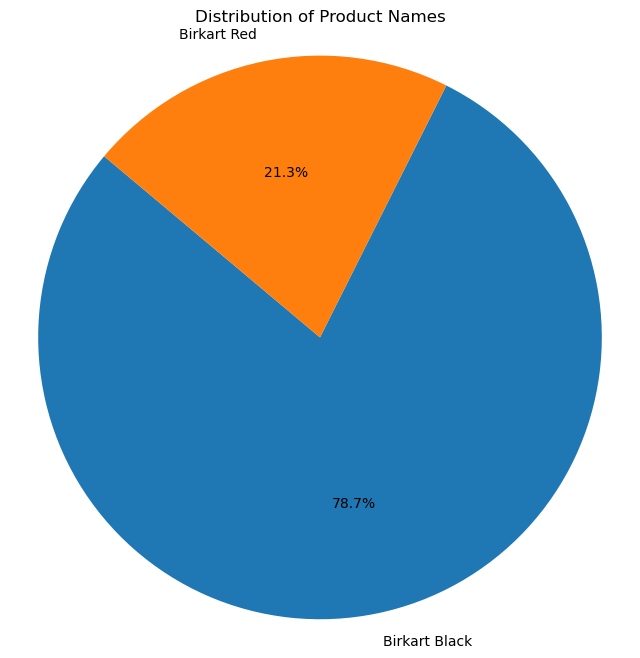

In [26]:
# Pie chart
# Calculating counts for each product name
card_counts = df['PRODUCT_NAME'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(card_counts, labels=card_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Names')
plt.axis('equal') 
plt.show()



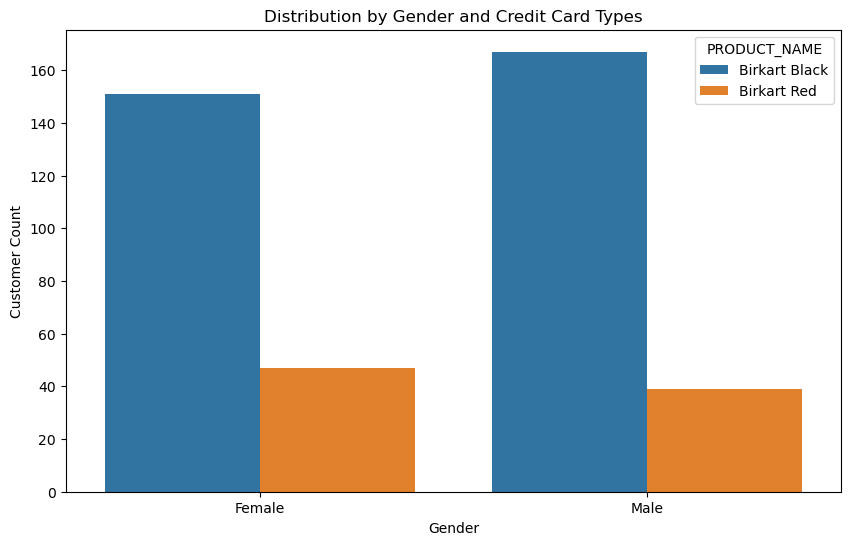

In [18]:
# Bar chart
# Grouping by gender and product name to calculate counts
gender_product_counts = df.groupby(['GENDER', 'PRODUCT_NAME']).size().reset_index(name='COUNT')
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_product_counts, x='GENDER', y='COUNT', hue='PRODUCT_NAME')
plt.title('Distribution by Gender and Credit Card Types')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.show()

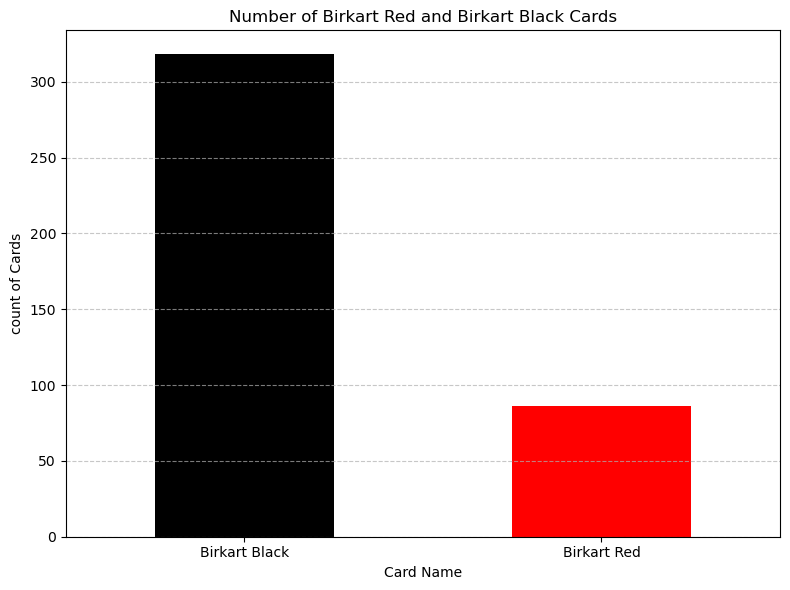

In [22]:
# Bar chart
# Counting the number of Birkart Red and Birkart Black cards
plt.figure(figsize=(8, 6))
df['PRODUCT_NAME'].value_counts().plot(kind='bar', color=['black', 'red'])
plt.title('Count of Birkart Red and Birkart Black Cards')
plt.xlabel('Card Name')
plt.ylabel('Count of Cards')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

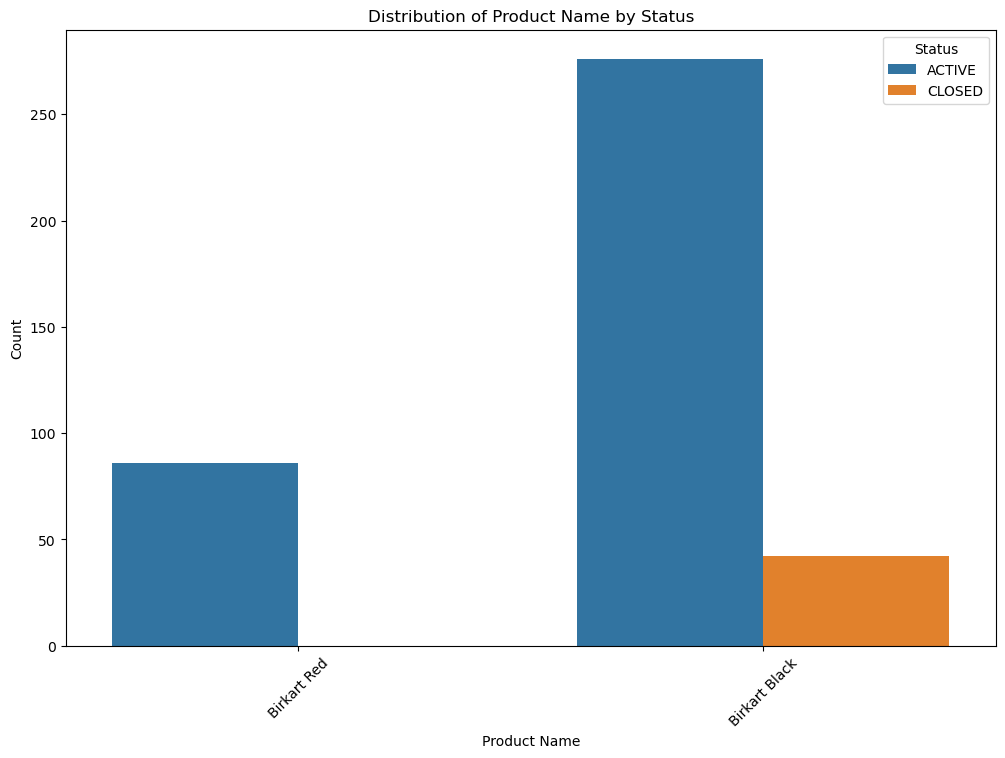

In [27]:
# Bar chart
# Visualizing the distribution of product names by status
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='PRODUCT_NAME', hue='STATUS')
plt.title('Distribution of Product Name by Status')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

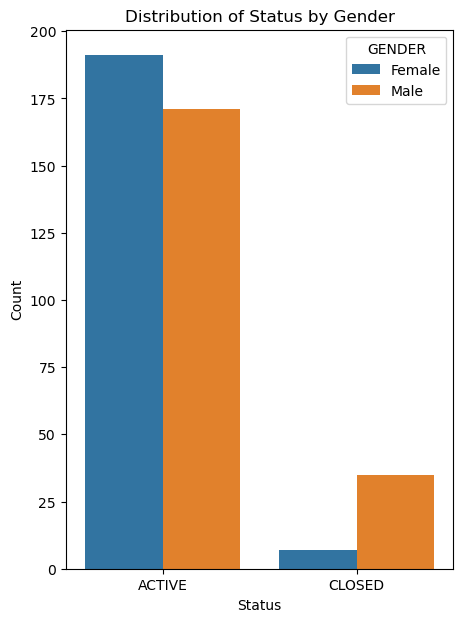

In [28]:
# Bar chart
# Visualizing the distribution of status by gender
plt.figure(figsize=(5, 7))
sns.countplot(data=df, x='STATUS', hue='GENDER')
plt.title('Distribution of Status by Gender')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


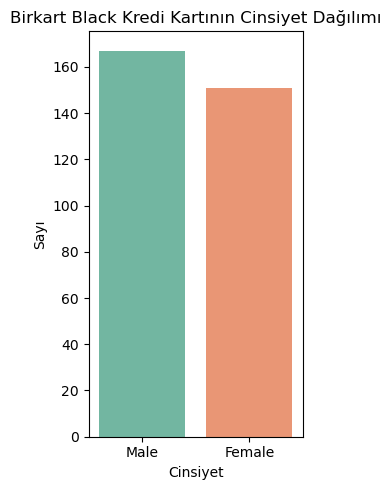

In [13]:
# Countplot
# Visualizing the distribution of gender for the "Birkart Black" credit card.
plt.figure(figsize=(3, 5))
sns.countplot(data=df[df['PRODUCT_NAME'] == 'Birkart Black'], x='GENDER', palette='Set2')
plt.title('Distribution of Gender for Birkart Black Credit Card')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Figure size 4000x1200 with 0 Axes>

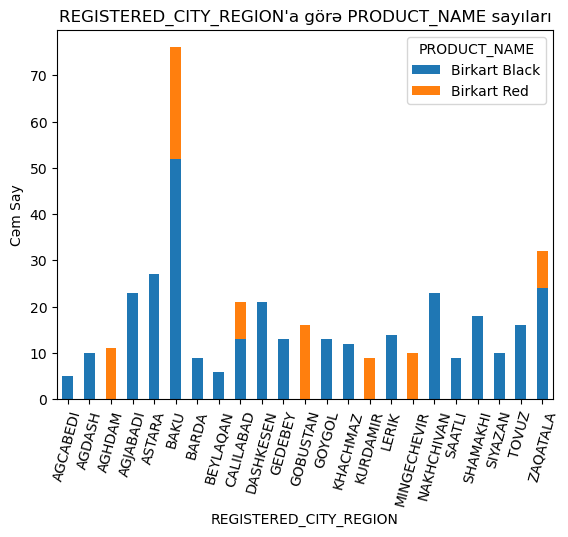

In [17]:
# Bar chart
# Visualizing the counts of PRODUCT_NAME for each REGISTERED_CITY_REGION.
product_region_counts = df.groupby(['REGISTERED_CITY_REGION', 'PRODUCT_NAME']).size().unstack(fill_value=0)
plt.figure(figsize=(40, 12))
product_region_counts.plot(kind='bar', stacked=True)
plt.title('Counts of PRODUCT_NAME by REGISTERED_CITY_REGION')
plt.xlabel('REGISTERED_CITY_REGION')
plt.ylabel('Total Count')
plt.xticks(rotation=75)
plt.legend(title='PRODUCT_NAME')
plt.show()


In [29]:
import plotly.express as px
# Pie chart for gender distribution of Birkart holders
fig_gender = px.pie(df, names='GENDER', title='Gender Distribution of Birkart Holders')
# Bar chart for card distribution by city
fig_city_product = px.bar(df, x='REGISTERED_CITY_REGION', color='PRODUCT_NAME', title='Card Distribution by Region')
# Histogram for card holders by income type
fig_income_type = px.histogram(df, x='INCOME_TYPE', title='Card Holders by Income Type')
# Display the plots
fig_gender.show()
fig_city_product.show()
fig_income_type.show()


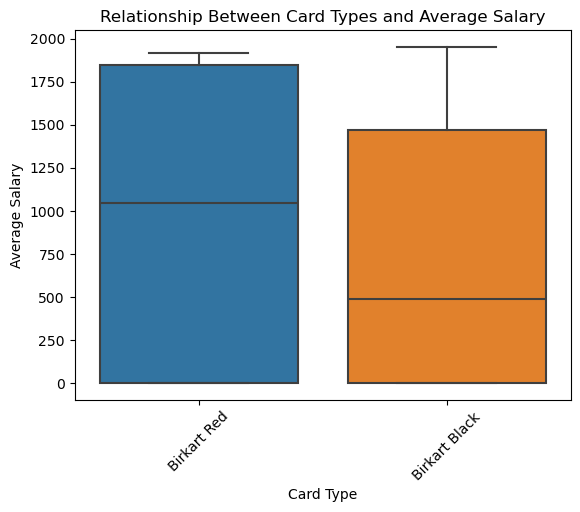

In [30]:
# Box plot showing the relationship between product names and average salary
sns.boxplot(x='PRODUCT_NAME', y='AVERAGE_SALARY', data=merged_df3)
plt.title('Relationship Between Card Types and Average Salary')
plt.xlabel('Card Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()